In [7]:
import numpy as np                         
import os                                   
from sklearn.metrics import confusion_matrix
import seaborn as sn                       
from sklearn.utils import shuffle          
import matplotlib.pyplot as plt            
import cv2                                 
import tensorflow as tf  

In [8]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,'street':1,'glacier':2,'buildings':3,'sea':4,'forest':5}
nb_classes = 6

In [11]:
def load_data():
    datasets = ['intelImage/train', 'intelImage/test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory =  dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     
        images = np.array(images, dtype = 'float32') 
        labels = np.array(labels, dtype = 'int32')          
        output.append((images, labels))
    return output

In [12]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [13]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150, 3)


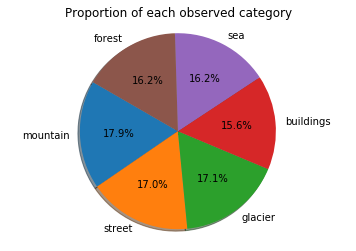

In [14]:
sizes = np.bincount(train_labels)
explode = (0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [15]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

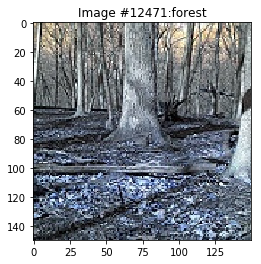

In [16]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{}:'.format(index) + class_names[train_labels[index]])
plt.show()

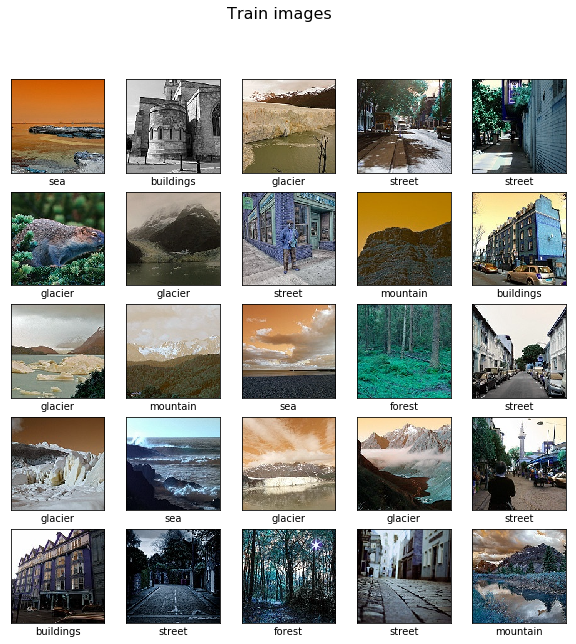

In [17]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Train images", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])

In [20]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
nbatch=32
nepoch=10
history = model.fit(train_images, 
                    train_labels, batch_size=nbatch, 
                    epochs=nepoch, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 79s 7ms/step - loss: 1.0925 - acc: 0.5784 - val_loss: 0.8296 - val_acc: 0.6747
Epoch 2/10
11227/11227 [==============================] - 68s 6ms/step - loss: 0.7187 - acc: 0.7292 - val_loss: 0.7318 - val_acc: 0.7317
Epoch 3/10
11227/11227 [==============================] - 68s 6ms/step - loss: 0.5408 - acc: 0.8040 - val_loss: 0.8130 - val_acc: 0.7139
Epoch 4/10
11227/11227 [==============================] - 68s 6ms/step - loss: 0.3327 - acc: 0.8797 - val_loss: 0.7949 - val_acc: 0.7585
Epoch 5/10
11227/11227 [==============================] - 68s 6ms/step - loss: 0.1707 - acc: 0.9425 - val_loss: 0.9340 - val_acc: 0.7528
Epoch 6/10
11227/11227 [==============================] - 68s 6ms/step - loss: 0.0989 - acc: 0.9688 - val_loss: 1.0042 - val_acc: 0.7506
Epoch 7/10
11227/11227 [==============================] - 67s 6ms/step - loss: 0.0423 - acc: 0.9887 - val_loss: 1.1070 - val_acc:

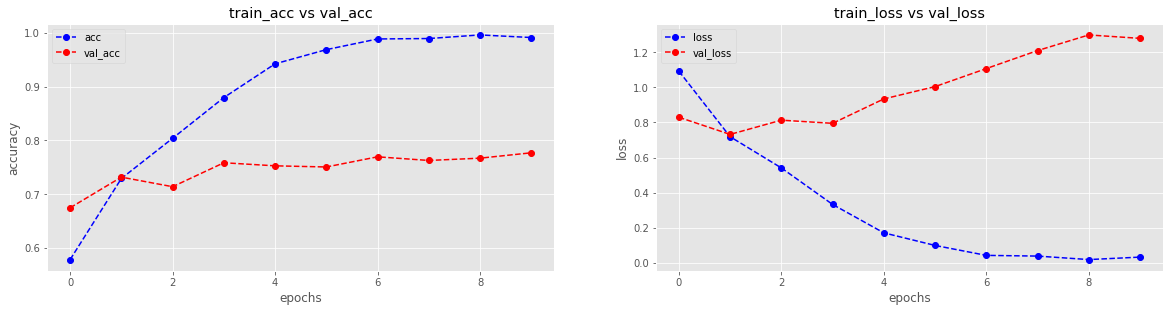

In [23]:
#########accuracy plot##############
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(history.history['acc'],'bo--', label = "acc")
plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
#############loss plot##############
plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [24]:
test_loss = model.evaluate(test_images, test_labels)

3000/3000 [==============================] - 6s 2ms/step


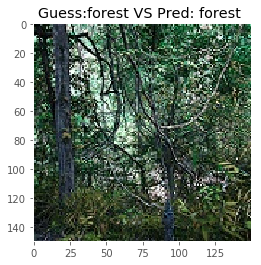

In [25]:
index = np.random.randint(test_images.shape[0])
img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img) 
pred_img = np.argmax(predictions[0]) 
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 
title = 'Guess:{} VS Pred: {} '.format(pred_label, true_label)
plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

In [26]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Mislabeled images by the classifier:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()

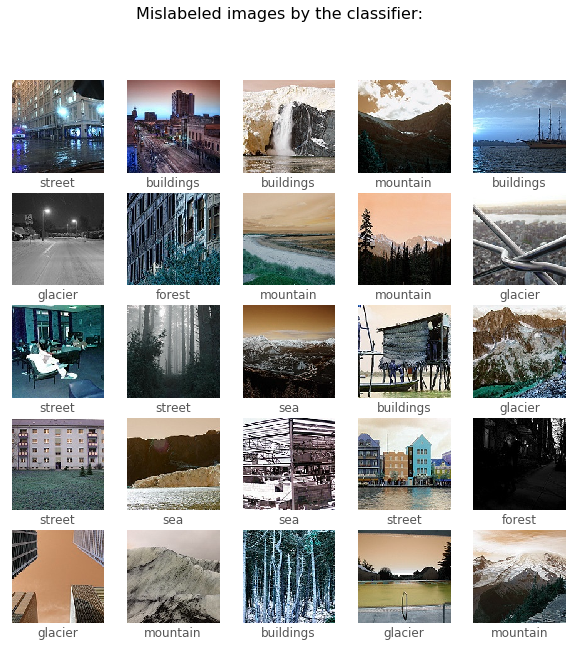

In [27]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

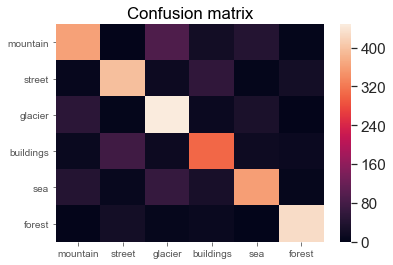

In [28]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=False,annot_kws={"size": 16}, 
           xticklabels=class_names, yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()